Creating Adiabatic Quantum Computing Demonstrations...

1. Basic Adiabatic Evolution...


/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:205: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:205: UserWarning: Glyph 8901 (\N{DOT OPERATOR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:205: UserWarning: Glyph 8811 (\N{MUCH GREATER-THAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:205: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:205: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
/Users/michaelpoppelaqarios/PycharmProjects/Parallel_Encoding_Circuits/venv/lib/py

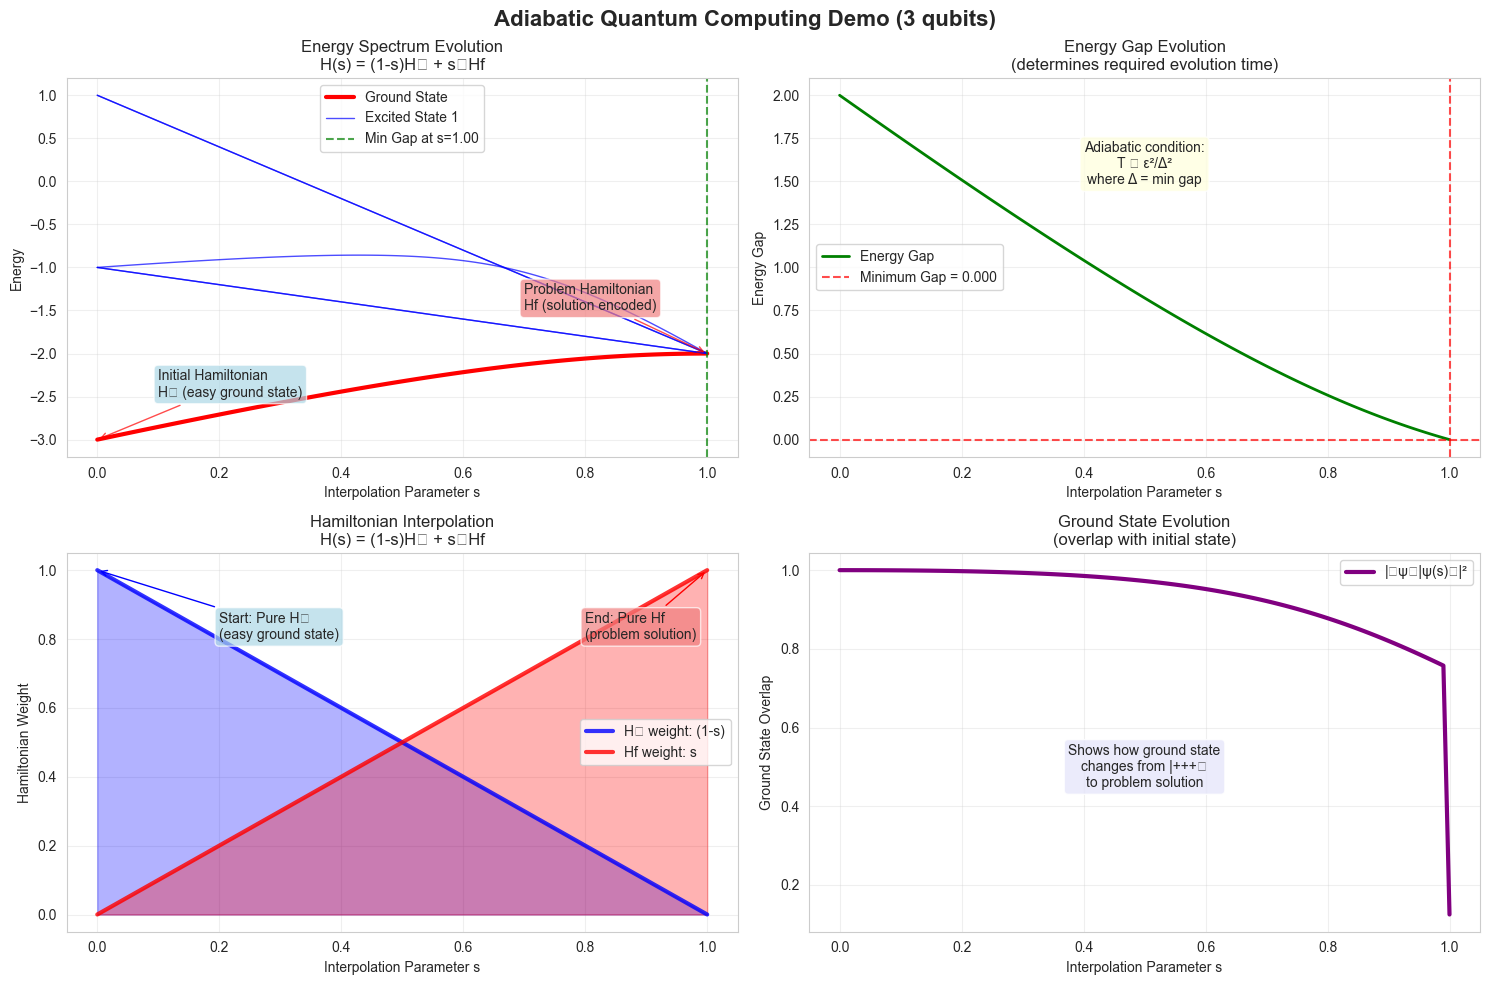


Key Results:
  - Minimum gap: 0.0000
  - Gap location: s = 1.000
  - This determines the required evolution time!

2. Gap Analysis and Timing Requirements...


/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:287: RuntimeWarning: divide by zero encountered in divide
  evolution_times = epsilon**2 / np.array(gaps)**2  # Adiabatic condition T ∝ ε²/Δ²
/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:288: RuntimeWarning: divide by zero encountered in scalar divide
  min_time_required = epsilon**2 / min_gap**2
/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:318: UserWarning: Glyph 8811 (\N{MUCH GREATER-THAN}) missing from font(s) Arial.
  plt.tight_layout()


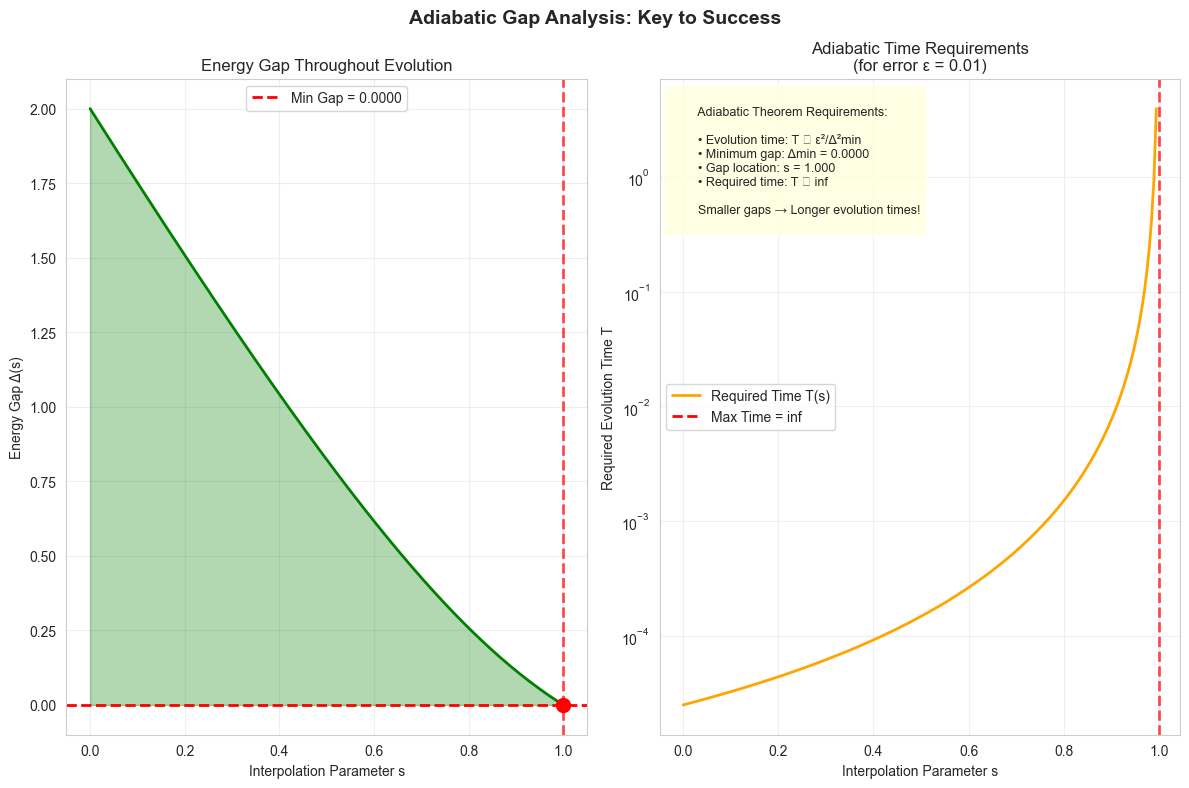

  - Minimum required evolution time: T ≫ inf
  - Going faster will cause diabatic transitions!

3. Adiabatic vs Diabatic Comparison...


/var/folders/g_/sjmkkkwx0m9b19mf8mrnv3l40000gn/T/ipykernel_2926/947408028.py:363: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


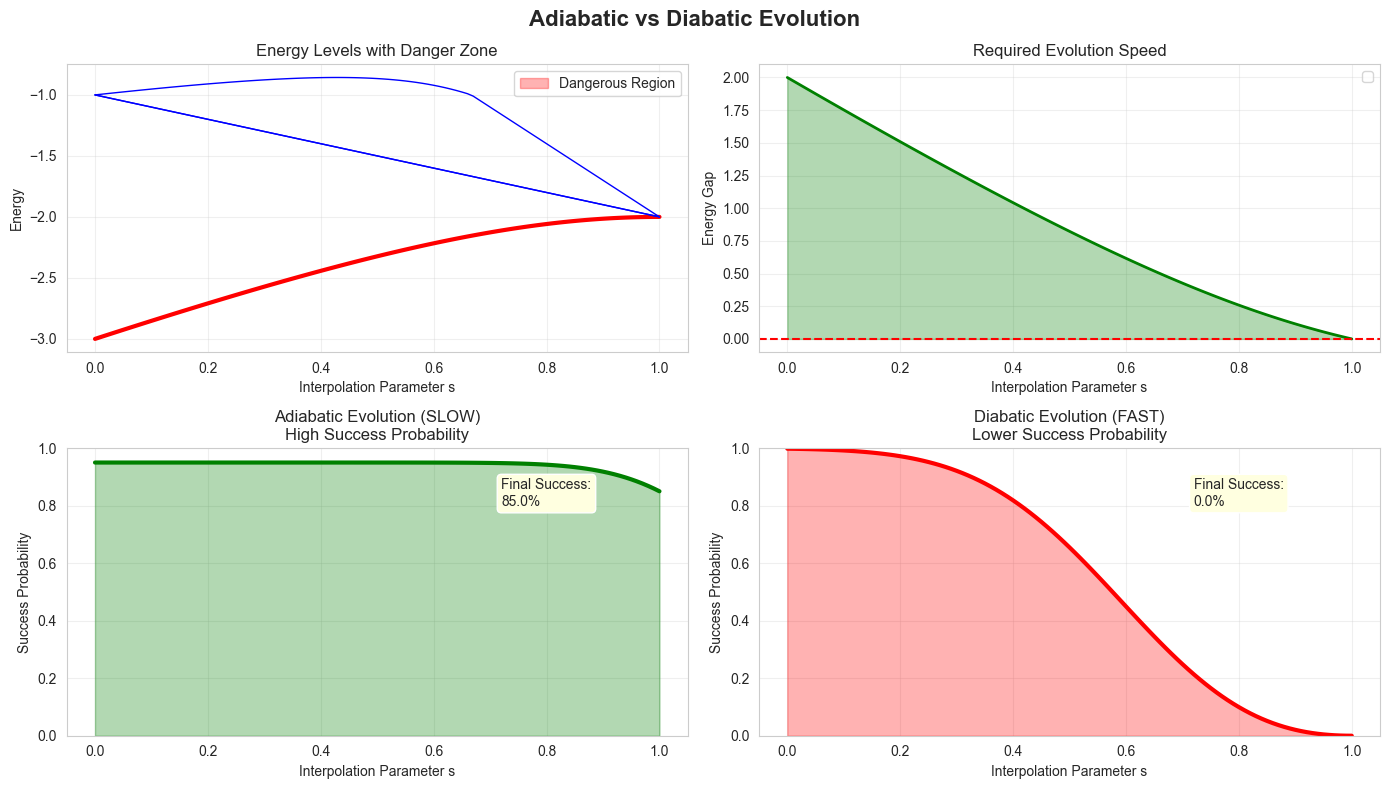


Key Insights:
  ✓ Adiabatic computing works by slowly changing the Hamiltonian
  ✓ The minimum energy gap determines required evolution time
  ✓ Too fast → diabatic transitions → wrong answer
  ✓ Too slow → decoherence kills the computation
  ✓ Sweet spot: just fast enough to beat decoherence


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

class AdiabaticComputingDemo:
    """
    Demonstration of Adiabatic Quantum Computing principles
    
    Shows the evolution of energy eigenvalues as we interpolate between
    an initial Hamiltonian H_0 (easy ground state) and final Hamiltonian H_f (problem).
    """
    
    def __init__(self, n_qubits=3):
        self.n_qubits = n_qubits
        self.n_states = 2**n_qubits
        self.setup_hamiltonians()
    
    def setup_hamiltonians(self):
        """Set up initial and final Hamiltonians."""
        # Pauli matrices
        self.sigma_x = np.array([[0, 1], [1, 0]])
        self.sigma_z = np.array([[1, 0], [0, -1]])
        self.identity = np.eye(2)
        
        # Create initial Hamiltonian: H_0 = -sum_i X_i (transverse field)
        # Ground state is |+++...+⟩ (easy to prepare)
        self.H_initial = self.create_transverse_field_hamiltonian()
        
        # Create final Hamiltonian: Problem Hamiltonian (MaxCut example)
        # Ground state encodes the solution we want to find
        self.H_final = self.create_problem_hamiltonian()
        
        # Get ground state of initial Hamiltonian (should be |+++...+⟩)
        self.initial_ground_state = self.get_uniform_superposition()
    
    def create_transverse_field_hamiltonian(self):
        """Create H_0 = -∑_i X_i (transverse field Ising model)."""
        H = np.zeros((self.n_states, self.n_states))
        
        for i in range(self.n_qubits):
            # Create X_i operator
            X_i = self.create_single_qubit_operator(i, self.sigma_x)
            H -= X_i  # Negative sign so ground state is |+++...+⟩
        
        return H
    
    def create_problem_hamiltonian(self):
        """Create problem Hamiltonian for MaxCut on a triangle."""
        if self.n_qubits == 3:
            # Triangle graph: edges (0,1), (1,2), (2,0)
            adjacency = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
        elif self.n_qubits == 2:
            # Single edge
            adjacency = np.array([[0, 1], [1, 0]])
        else:
            # Linear chain for other sizes
            adjacency = np.zeros((self.n_qubits, self.n_qubits))
            for i in range(self.n_qubits - 1):
                adjacency[i, i+1] = adjacency[i+1, i] = 1
        
        H = np.zeros((self.n_states, self.n_states))
        
        # MaxCut Hamiltonian: H = -1/2 * ∑_{i,j} A_{ij} (1 - Z_i Z_j)
        for i in range(self.n_qubits):
            for j in range(i + 1, self.n_qubits):
                if adjacency[i, j] == 1:
                    # Add -1/2 * (1 - Z_i Z_j) = -1/2 + 1/2 * Z_i Z_j
                    ZZ_ij = self.create_two_qubit_operator(i, j, self.sigma_z, self.sigma_z)
                    H += 0.5 * ZZ_ij
                    H -= 0.5 * np.eye(self.n_states)
        
        return H
    
    def create_single_qubit_operator(self, qubit_idx, pauli_matrix):
        """Create single-qubit Pauli operator acting on qubit_idx."""
        op = np.array([[1.0]])
        
        for i in range(self.n_qubits):
            if i == qubit_idx:
                op = np.kron(op, pauli_matrix)
            else:
                op = np.kron(op, self.identity)
        
        return op
    
    def create_two_qubit_operator(self, qubit1, qubit2, pauli1, pauli2):
        """Create two-qubit Pauli operator."""
        op = np.array([[1.0]])
        
        for i in range(self.n_qubits):
            if i == qubit1:
                op = np.kron(op, pauli1)
            elif i == qubit2:
                op = np.kron(op, pauli2)
            else:
                op = np.kron(op, self.identity)
        
        return op
    
    def get_uniform_superposition(self):
        """Get uniform superposition |+++...+⟩ state."""
        state = np.ones(self.n_states) / np.sqrt(self.n_states)
        return state
    
    def interpolated_hamiltonian(self, s):
        """
        Create interpolated Hamiltonian H(s) = (1-s)H_0 + s*H_f
        where s ∈ [0,1]
        """
        return (1 - s) * self.H_initial + s * self.H_final
    
    def compute_energy_spectrum(self, s_values):
        """Compute energy eigenvalues for different interpolation parameters."""
        energies = []
        eigenvectors = []
        
        for s in s_values:
            H_s = self.interpolated_hamiltonian(s)
            eigenvals, eigenvecs = eigh(H_s)
            energies.append(eigenvals)
            eigenvectors.append(eigenvecs)
        
        return np.array(energies), eigenvectors
    
    def find_minimum_gap(self, s_values, energies):
        """Find the minimum energy gap during evolution."""
        gaps = []
        for i, energy_spectrum in enumerate(energies):
            gap = energy_spectrum[1] - energy_spectrum[0]  # Gap between ground and first excited
            gaps.append(gap)
        
        min_gap_idx = np.argmin(gaps)
        min_gap = gaps[min_gap_idx]
        min_gap_s = s_values[min_gap_idx]
        
        return gaps, min_gap, min_gap_s
    
    def plot_adiabatic_evolution(self, figsize=(15, 10)):
        """Create comprehensive adiabatic evolution visualization."""
        # Define interpolation parameters
        s_values = np.linspace(0, 1, 101)
        
        # Compute energy spectrum evolution
        energies, eigenvectors = self.compute_energy_spectrum(s_values)
        gaps, min_gap, min_gap_s = self.find_minimum_gap(s_values, energies)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle(f'Adiabatic Quantum Computing Demo ({self.n_qubits} qubits)', 
                    fontsize=16, fontweight='bold')
        
        # 1. Energy spectrum evolution
        for level in range(min(6, self.n_states)):  # Show first 6 energy levels
            color = 'red' if level == 0 else 'blue'
            linewidth = 3 if level == 0 else 1
            alpha = 1.0 if level == 0 else 0.7
            label = 'Ground State' if level == 0 else f'Excited State {level}' if level == 1 else None
            
            ax1.plot(s_values, energies[:, level], color=color, linewidth=linewidth, 
                    alpha=alpha, label=label)
        
        ax1.axvline(x=min_gap_s, color='green', linestyle='--', alpha=0.7, 
                   label=f'Min Gap at s={min_gap_s:.2f}')
        ax1.set_xlabel('Interpolation Parameter s')
        ax1.set_ylabel('Energy')
        ax1.set_title('Energy Spectrum Evolution\nH(s) = (1-s)H₀ + s⋅Hf')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Add annotations
        ax1.annotate('Initial Hamiltonian\nH₀ (easy ground state)', 
                    xy=(0, energies[0, 0]), xytext=(0.1, energies[0, 0] + 0.5),
                    arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        ax1.annotate('Problem Hamiltonian\nHf (solution encoded)', 
                    xy=(1, energies[-1, 0]), xytext=(0.7, energies[-1, 0] + 0.5),
                    arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
        
        # 2. Energy gap evolution
        ax2.plot(s_values, gaps, 'green', linewidth=2, label='Energy Gap')
        ax2.axhline(y=min_gap, color='red', linestyle='--', alpha=0.7, 
                   label=f'Minimum Gap = {min_gap:.3f}')
        ax2.axvline(x=min_gap_s, color='red', linestyle='--', alpha=0.7)
        ax2.set_xlabel('Interpolation Parameter s')
        ax2.set_ylabel('Energy Gap')
        ax2.set_title('Energy Gap Evolution\n(determines required evolution time)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Add gap importance annotation
        ax2.text(0.5, max(gaps) * 0.8, 
                'Adiabatic condition:\nT ≫ ε²/Δ²\nwhere Δ = min gap', 
                ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))
        
        # 3. Hamiltonian components
        self._plot_hamiltonian_components(ax3, s_values)
        
        # 4. Quantum state evolution (ground state overlap)
        self._plot_state_evolution(ax4, s_values, eigenvectors)
        
        plt.tight_layout()
        return fig, s_values, energies, gaps, min_gap, min_gap_s
    
    def _plot_hamiltonian_components(self, ax, s_values):
        """Plot the weights of initial and final Hamiltonian components."""
        initial_weights = 1 - s_values
        final_weights = s_values
        
        ax.plot(s_values, initial_weights, 'blue', linewidth=3, 
               label='H₀ weight: (1-s)', alpha=0.8)
        ax.plot(s_values, final_weights, 'red', linewidth=3, 
               label='Hf weight: s', alpha=0.8)
        ax.fill_between(s_values, 0, initial_weights, alpha=0.3, color='blue')
        ax.fill_between(s_values, 0, final_weights, alpha=0.3, color='red')
        
        ax.set_xlabel('Interpolation Parameter s')
        ax.set_ylabel('Hamiltonian Weight')
        ax.set_title('Hamiltonian Interpolation\nH(s) = (1-s)H₀ + s⋅Hf')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add annotations
        ax.annotate('Start: Pure H₀\n(easy ground state)', 
                   xy=(0, 1), xytext=(0.2, 0.8),
                   arrowprops=dict(arrowstyle='->', color='blue'),
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        ax.annotate('End: Pure Hf\n(problem solution)', 
                   xy=(1, 1), xytext=(0.8, 0.8),
                   arrowprops=dict(arrowstyle='->', color='red'),
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    
    def _plot_state_evolution(self, ax, s_values, eigenvectors):
        """Plot how the ground state evolves during adiabatic evolution."""
        # Calculate overlap with initial ground state
        initial_gs = self.initial_ground_state
        overlaps = []
        
        for eigenvecs in eigenvectors:
            current_gs = eigenvecs[:, 0]  # Ground state eigenvector
            overlap = abs(np.dot(np.conj(current_gs), initial_gs))**2
            overlaps.append(overlap)
        
        ax.plot(s_values, overlaps, 'purple', linewidth=3, label='|⟨ψ₀|ψ(s)⟩|²')
        ax.set_xlabel('Interpolation Parameter s')
        ax.set_ylabel('Ground State Overlap')
        ax.set_title('Ground State Evolution\n(overlap with initial state)')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Add interpretation
        ax.text(0.5, 0.5, 
               'Shows how ground state\nchanges from |+++⟩\nto problem solution', 
               ha='center', va='center',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lavender", alpha=0.8))
    
    def create_gap_analysis(self, figsize=(12, 8)):
        """Create detailed analysis of the minimum gap and its implications."""
        s_values = np.linspace(0, 1, 201)  # Higher resolution for gap analysis
        energies, _ = self.compute_energy_spectrum(s_values)
        gaps, min_gap, min_gap_s = self.find_minimum_gap(s_values, energies)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle('Adiabatic Gap Analysis: Key to Success', fontsize=14, fontweight='bold')
        
        # 1. Detailed gap plot
        ax1.plot(s_values, gaps, 'green', linewidth=2)
        ax1.axhline(y=min_gap, color='red', linestyle='--', linewidth=2, 
                   label=f'Min Gap = {min_gap:.4f}')
        ax1.axvline(x=min_gap_s, color='red', linestyle='--', linewidth=2, alpha=0.7)
        ax1.fill_between(s_values, 0, gaps, alpha=0.3, color='green')
        
        # Highlight minimum gap region
        ax1.scatter([min_gap_s], [min_gap], color='red', s=100, zorder=5)
        ax1.set_xlabel('Interpolation Parameter s')
        ax1.set_ylabel('Energy Gap Δ(s)')
        ax1.set_title('Energy Gap Throughout Evolution')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Evolution time requirements
        epsilon = 0.01  # Desired error probability
        evolution_times = epsilon**2 / np.array(gaps)**2  # Adiabatic condition T ∝ ε²/Δ²
        min_time_required = epsilon**2 / min_gap**2
        
        ax2.semilogy(s_values, evolution_times, 'orange', linewidth=2, 
                    label='Required Time T(s)')
        ax2.axhline(y=min_time_required, color='red', linestyle='--', linewidth=2,
                   label=f'Max Time = {min_time_required:.1f}')
        ax2.axvline(x=min_gap_s, color='red', linestyle='--', linewidth=2, alpha=0.7)
        
        ax2.set_xlabel('Interpolation Parameter s')
        ax2.set_ylabel('Required Evolution Time T')
        ax2.set_title(f'Adiabatic Time Requirements\n(for error ε = {epsilon})')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Add explanation text
        explanation = f"""
        Adiabatic Theorem Requirements:
        
        • Evolution time: T ≫ ε²/Δ²min
        • Minimum gap: Δmin = {min_gap:.4f}
        • Gap location: s = {min_gap_s:.3f}
        • Required time: T ≫ {min_time_required:.1f}
        
        Smaller gaps → Longer evolution times!
        """
        
        ax2.text(0.02, 0.98, explanation, transform=ax2.transAxes, va='top', ha='left',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
                fontsize=9)
        
        plt.tight_layout()
        return fig, min_gap, min_gap_s, min_time_required
    
    def demonstrate_diabatic_vs_adiabatic(self, figsize=(14, 8)):
        """Show what happens when evolution is too fast (diabatic) vs slow (adiabatic)."""
        s_values = np.linspace(0, 1, 101)
        energies, eigenvectors = self.compute_energy_spectrum(s_values)
        gaps, min_gap, min_gap_s = self.find_minimum_gap(s_values, energies)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle('Adiabatic vs Diabatic Evolution', fontsize=16, fontweight='bold')
        
        # 1. Energy spectrum with crossing region highlighted
        for level in range(min(4, self.n_states)):
            color = 'red' if level == 0 else 'blue'
            linewidth = 3 if level == 0 else 1
            ax1.plot(s_values, energies[:, level], color=color, linewidth=linewidth)
        
        # Highlight dangerous region (small gap)
        danger_mask = np.array(gaps) < min_gap * 2
        ax1.fill_between(s_values[danger_mask], 
                        np.min(energies[danger_mask, :4], axis=1), 
                        np.max(energies[danger_mask, :4], axis=1),
                        alpha=0.3, color='red', label='Dangerous Region')
        
        ax1.set_xlabel('Interpolation Parameter s')
        ax1.set_ylabel('Energy')
        ax1.set_title('Energy Levels with Danger Zone')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Gap with timing annotations
        ax2.plot(s_values, gaps, 'green', linewidth=2)
        ax2.axhline(y=min_gap, color='red', linestyle='--')
        ax2.fill_between(s_values, 0, gaps, alpha=0.3, color='green')
        
        # Add speed indicators
        slow_region = s_values[np.array(gaps) < min_gap * 3]
        if len(slow_region) > 0:
            ax2.axvspan(slow_region[0], slow_region[-1], alpha=0.2, color='red', 
                       label='Must go SLOWLY here')
        
        ax2.set_xlabel('Interpolation Parameter s')
        ax2.set_ylabel('Energy Gap')
        ax2.set_title('Required Evolution Speed')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Adiabatic success probability
        self._plot_success_probability(ax3, s_values, gaps, 'adiabatic')
        
        # 4. Diabatic failure example
        self._plot_success_probability(ax4, s_values, gaps, 'diabatic')
        
        plt.tight_layout()
        return fig
    
    def _plot_success_probability(self, ax, s_values, gaps, regime):
        """Plot success probability for adiabatic vs diabatic evolution."""
        if regime == 'adiabatic':
            # High success probability (slow evolution)
            base_prob = 0.95
            prob_reduction = 0.1 * np.exp(-np.array(gaps) * 10)
            success_prob = base_prob - prob_reduction
            color = 'green'
            title = 'Adiabatic Evolution (SLOW)\nHigh Success Probability'
        else:
            # Lower success probability (fast evolution, Landau-Zener transitions)
            landau_zener_prob = np.exp(-np.pi * np.array(gaps)**2 / 2)  # Simplified LZ formula
            success_prob = 1 - landau_zener_prob
            color = 'red'
            title = 'Diabatic Evolution (FAST)\nLower Success Probability'
        
        ax.plot(s_values, success_prob, color=color, linewidth=3)
        ax.fill_between(s_values, 0, success_prob, alpha=0.3, color=color)
        ax.set_xlabel('Interpolation Parameter s')
        ax.set_ylabel('Success Probability')
        ax.set_title(title)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
        
        # Add final probability
        final_prob = success_prob[-1]
        ax.text(0.7, 0.8, f'Final Success:\n{final_prob:.1%}', 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"),
               transform=ax.transAxes)


def main():
    """Demonstrate adiabatic quantum computing principles."""
    print("Creating Adiabatic Quantum Computing Demonstrations...")
    
    # Create demo for 3-qubit system
    demo = AdiabaticComputingDemo(n_qubits=3)
    
    print("\n1. Basic Adiabatic Evolution...")
    fig1, s_vals, energies, gaps, min_gap, min_gap_s = demo.plot_adiabatic_evolution()
    plt.show()
    
    print(f"\nKey Results:")
    print(f"  - Minimum gap: {min_gap:.4f}")
    print(f"  - Gap location: s = {min_gap_s:.3f}")
    print(f"  - This determines the required evolution time!")
    
    print("\n2. Gap Analysis and Timing Requirements...")
    fig2, min_gap, min_gap_s, min_time = demo.create_gap_analysis()
    plt.show()
    
    print(f"  - Minimum required evolution time: T ≫ {min_time:.1f}")
    print(f"  - Going faster will cause diabatic transitions!")
    
    print("\n3. Adiabatic vs Diabatic Comparison...")
    fig3 = demo.demonstrate_diabatic_vs_adiabatic()
    plt.show()
    
    print("\nKey Insights:")
    print("  ✓ Adiabatic computing works by slowly changing the Hamiltonian")
    print("  ✓ The minimum energy gap determines required evolution time")
    print("  ✓ Too fast → diabatic transitions → wrong answer")
    print("  ✓ Too slow → decoherence kills the computation")
    print("  ✓ Sweet spot: just fast enough to beat decoherence")


if __name__ == "__main__":
    main()